In [ ]:
# Import required libraries
import sys
sys.path.append('../src')

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path
from shapely.geometry import box

# Import project modules with reload support
import importlib

# Remove cached module if it exists to force reload
if 'visualization' in sys.modules:
    del sys.modules['visualization']

import visualization
importlib.reload(visualization)

from visualization import (
    plot_suitability_map,
    plot_top_buildings,
    plot_scatter_analysis,
    generate_summary_report,
    plot_solar_potential_choropleth,
    create_interactive_folium_map,
    plot_pairwise_analysis,
    create_top_buildings_map
)

# Optional: Import folium if available
try:
    import folium
    FOLIUM_AVAILABLE = True
except ImportError:
    FOLIUM_AVAILABLE = False
    print("⚠️  Folium not available. Interactive maps will be skipped.")

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100

# Ensure output directories exist
Path("../outputs/figures").mkdir(parents=True, exist_ok=True)
Path("../outputs/maps").mkdir(parents=True, exist_ok=True)
Path("../outputs/reports").mkdir(parents=True, exist_ok=True)

print("✅ Libraries imported successfully!")
print("✅ Visualization module reloaded with latest changes!")

✅ Libraries imported successfully!
✅ Visualization module reloaded with latest changes!


## 1. Load Processed Data

In [2]:
# Load processed building data from notebook 02 (using TEST datasets)
print("Loading processed TEST building data...")

# Load ranked buildings (TEST dataset)
ranked_buildings = gpd.read_file("../data/ranked_test_buildings.json")

# Load top 20 buildings (TEST dataset)
top_buildings = gpd.read_file("../data/top_20_test_buildings.json")

print(f"✅ Loaded {len(ranked_buildings)} ranked buildings (TEST dataset)")
print(f"✅ Loaded {len(top_buildings)} top priority buildings (TEST dataset)")

# Display summary statistics
print(f"\n📊 Data Summary:")
print(f"\nSuitability Classification:")
print(ranked_buildings['suitability_class'].value_counts())

print(f"\nTop Buildings Statistics:")
print(f"  Total roof area: {top_buildings['roof_area'].sum() / 1000:.2f} thousand m²")
print(f"  Total energy potential: {top_buildings['energy_potential'].sum() / 1000:.2f} MWh/year")
print(f"  Average suitability score: {top_buildings['suitability_score'].mean():.2f}")

# Display sample of top buildings
print(f"\n🏆 Sample of Top Priority Buildings:")
display_cols = ['rank', 'roof_area', 'energy_potential', 'suitability_score', 'suitability_class']
print(top_buildings[display_cols].head(10))

Loading processed TEST building data...
✅ Loaded 3324 ranked buildings (TEST dataset)
✅ Loaded 20 top priority buildings (TEST dataset)

📊 Data Summary:

Suitability Classification:
suitability_class
Moderate     1513
Poor         1160
Good          327
Excellent     324
Name: count, dtype: int64

Top Buildings Statistics:
  Total roof area: 26.70 thousand m²
  Total energy potential: 4562.71 MWh/year
  Average suitability score: 98.95

🏆 Sample of Top Priority Buildings:
   rank    roof_area  energy_potential  suitability_score suitability_class
0     1  3251.185337     555712.104925          99.958084         Excellent
1     2   839.878696     143542.387879          99.527196         Excellent
2     3   584.102167      99828.051049          99.471146         Excellent
3     4  1300.743354     222308.124264          99.407206         Excellent
4     5  1076.992809     184067.258418          99.382699         Excellent
5     6   641.286893     109601.183100          99.369319         E

## 2. Interactive Map with Color-Coded Suitability

In [3]:
# Create suitability map
print("Creating suitability map...")

# Create map using the visualization module
fig = plot_suitability_map(
    buildings_gdf=ranked_buildings,
    suitability_column='suitability_score',
    output_path="../outputs/maps/suitability_map.png"
)

plt.show()

print(f"✅ Suitability map created!")
print(f"   Saved to: ../outputs/maps/suitability_map.png")
print(f"\n📌 Map Legend:")
print(f"   🟢 Green: Excellent suitability (score ≥ 80)")
print(f"   🟡 Yellow: Good suitability (score 60-79)")
print(f"   🟠 Orange: Fair/Moderate suitability (score 40-59)")
print(f"   🔴 Red: Poor suitability (score < 40)")

Creating suitability map...
Suitability map saved to: ../outputs/maps/suitability_map.png
✅ Suitability map created!
   Saved to: ../outputs/maps/suitability_map.png

📌 Map Legend:
   🟢 Green: Excellent suitability (score ≥ 80)
   🟡 Yellow: Good suitability (score 60-79)
   🟠 Orange: Fair/Moderate suitability (score 40-59)
   🔴 Red: Poor suitability (score < 40)


## 3. Scatter Analysis Plots

Creating scatter analysis plots...


/tmp/ipykernel_73754/1958763150.py:49: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[1, 1].boxplot(class_data, labels=class_labels, patch_artist=True,


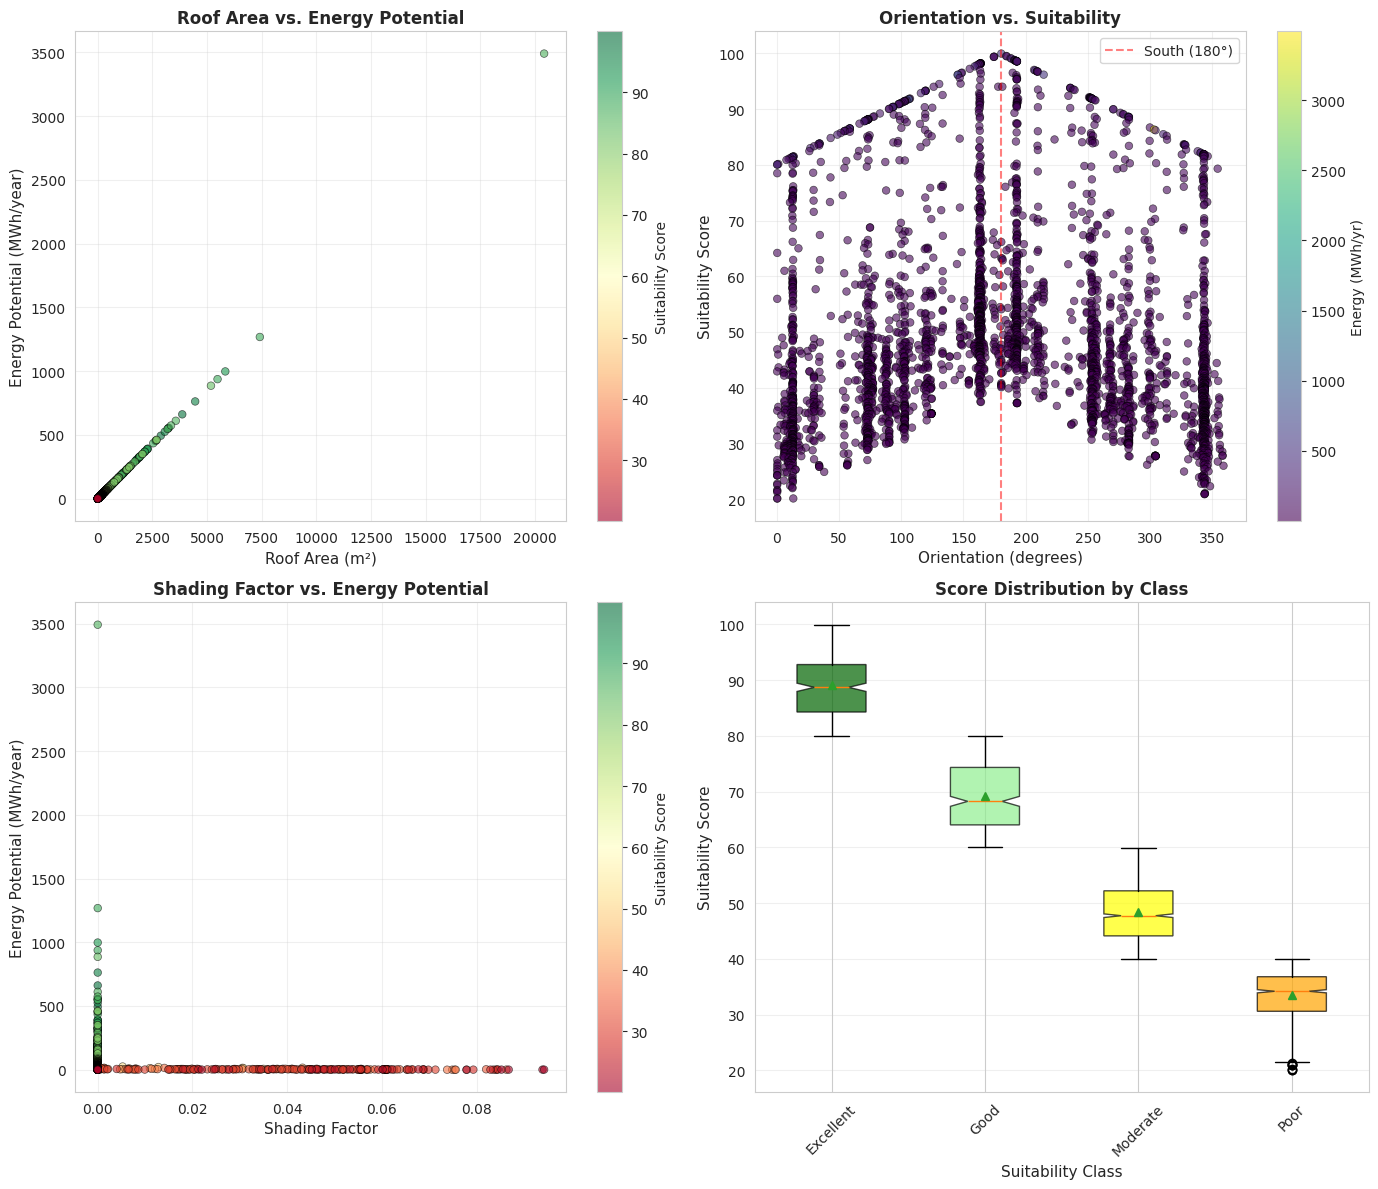


✅ Scatter analysis plots created!
   Saved to: ../outputs/figures/scatter_analysis.png

📊 Key Relationships:
   • Roof area vs. energy potential: Strong positive correlation
   • Orientation effects on suitability: South-facing (180°) optimal
   • Shading factor vs. energy: Negative correlation (higher shading = lower energy)
   • Score distribution shows clear class separation


In [4]:
# Create scatter analysis plots
print("Creating scatter analysis plots...")

# Create a 2x2 grid of scatter plots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 1. Roof area vs. energy potential
scatter1 = axes[0, 0].scatter(ranked_buildings['roof_area'], 
                              ranked_buildings['energy_potential']/1000,
                              c=ranked_buildings['suitability_score'],
                              cmap='RdYlGn', alpha=0.6, s=30, edgecolor='black', linewidth=0.5)
axes[0, 0].set_xlabel('Roof Area (m²)', fontsize=11)
axes[0, 0].set_ylabel('Energy Potential (MWh/year)', fontsize=11)
axes[0, 0].set_title('Roof Area vs. Energy Potential', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0, 0], label='Suitability Score')

# 2. Orientation vs. suitability score
scatter2 = axes[0, 1].scatter(ranked_buildings['orientation'], 
                              ranked_buildings['suitability_score'],
                              c=ranked_buildings['energy_potential']/1000,
                              cmap='viridis', alpha=0.6, s=30, edgecolor='black', linewidth=0.5)
axes[0, 1].set_xlabel('Orientation (degrees)', fontsize=11)
axes[0, 1].set_ylabel('Suitability Score', fontsize=11)
axes[0, 1].set_title('Orientation vs. Suitability', fontsize=12, fontweight='bold')
axes[0, 1].axvline(180, color='red', linestyle='--', alpha=0.5, label='South (180°)')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].legend()
plt.colorbar(scatter2, ax=axes[0, 1], label='Energy (MWh/yr)')

# 3. Shading factor vs. energy potential
scatter3 = axes[1, 0].scatter(ranked_buildings['shading_factor'], 
                              ranked_buildings['energy_potential']/1000,
                              c=ranked_buildings['suitability_score'],
                              cmap='RdYlGn', alpha=0.6, s=30, edgecolor='black', linewidth=0.5)
axes[1, 0].set_xlabel('Shading Factor', fontsize=11)
axes[1, 0].set_ylabel('Energy Potential (MWh/year)', fontsize=11)
axes[1, 0].set_title('Shading Factor vs. Energy Potential', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)
plt.colorbar(scatter3, ax=axes[1, 0], label='Suitability Score')

# 4. Suitability score by class (box plot)
classes = ['Excellent', 'Good', 'Moderate', 'Fair', 'Poor']
class_data = [ranked_buildings[ranked_buildings['suitability_class'] == cls]['suitability_score'].values 
              for cls in classes if cls in ranked_buildings['suitability_class'].values]
class_labels = [cls for cls in classes if cls in ranked_buildings['suitability_class'].values]
colors_list = ['darkgreen', 'lightgreen', 'yellow', 'orange', 'red'][:len(class_labels)]

bp = axes[1, 1].boxplot(class_data, labels=class_labels, patch_artist=True, 
                        notch=True, showmeans=True)
for patch, color in zip(bp['boxes'], colors_list):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
axes[1, 1].set_xlabel('Suitability Class', fontsize=11)
axes[1, 1].set_ylabel('Suitability Score', fontsize=11)
axes[1, 1].set_title('Score Distribution by Class', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig("../outputs/figures/scatter_analysis.png", dpi=300, bbox_inches='tight')
plt.show()

print(f"\n✅ Scatter analysis plots created!")
print(f"   Saved to: ../outputs/figures/scatter_analysis.png")
print(f"\n📊 Key Relationships:")
print(f"   • Roof area vs. energy potential: Strong positive correlation")
print(f"   • Orientation effects on suitability: South-facing (180°) optimal")
print(f"   • Shading factor vs. energy: Negative correlation (higher shading = lower energy)")
print(f"   • Score distribution shows clear class separation")

## 4. Statistical Summary

Creating statistical summary visualizations...


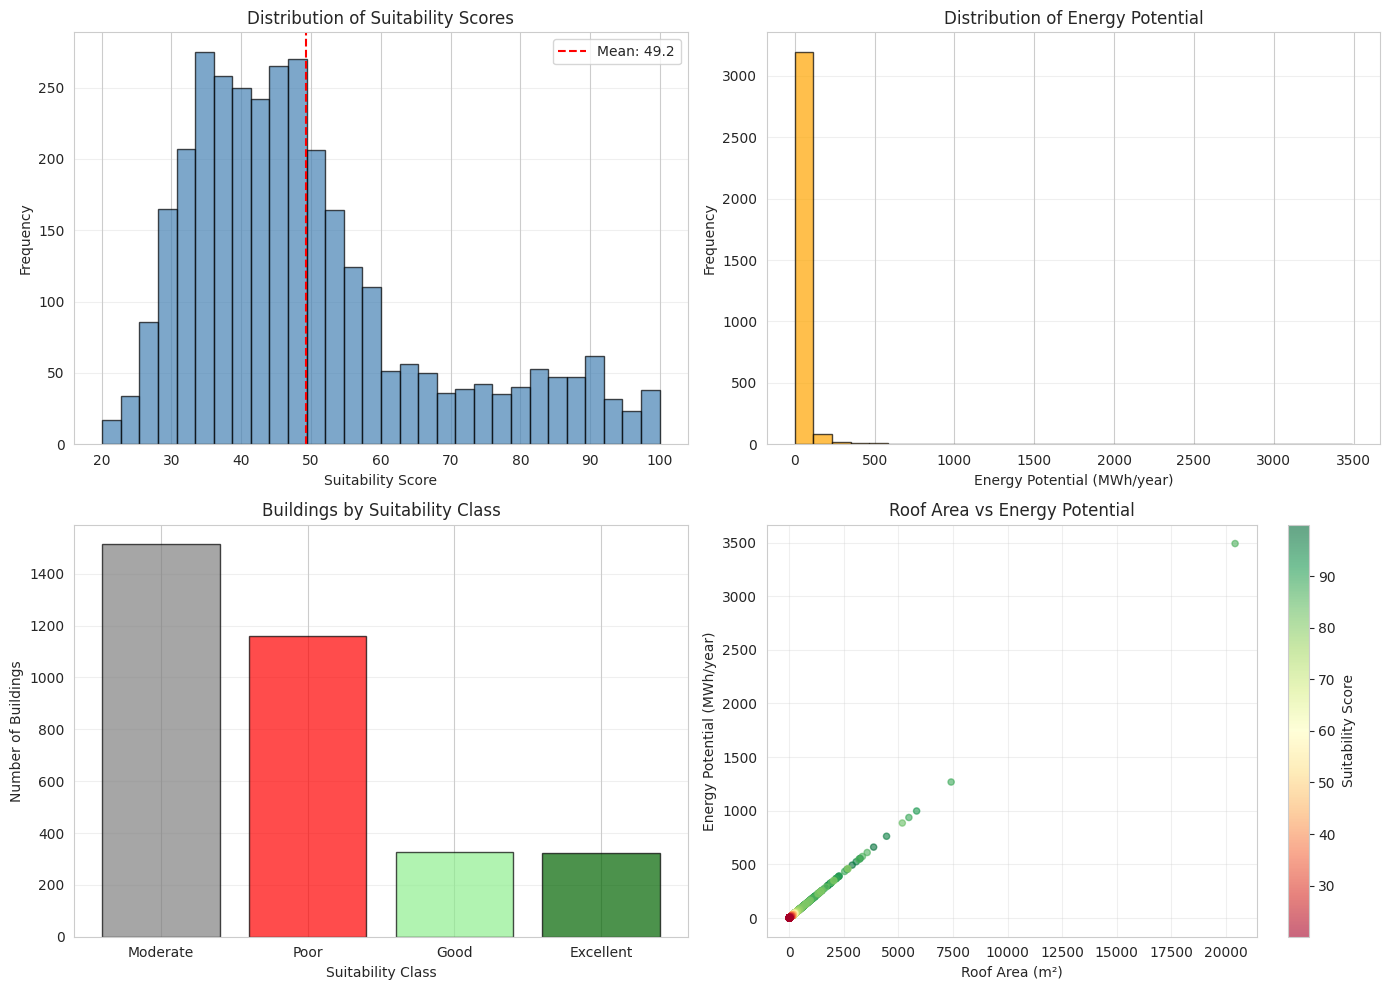

✅ Statistical summary created!
   Saved to: ../outputs/figures/statistical_summary.png


In [5]:
# Create statistical summary visualizations
print("Creating statistical summary visualizations...")

# 1. Distribution plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Suitability score distribution
axes[0, 0].hist(ranked_buildings['suitability_score'], bins=30, color='steelblue', 
                alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('Suitability Score')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Suitability Scores')
axes[0, 0].axvline(ranked_buildings['suitability_score'].mean(), 
                    color='red', linestyle='--', label=f"Mean: {ranked_buildings['suitability_score'].mean():.1f}")
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Energy potential distribution
axes[0, 1].hist(ranked_buildings['energy_potential']/1000, bins=30, color='orange', 
                alpha=0.7, edgecolor='black')
axes[0, 1].set_xlabel('Energy Potential (MWh/year)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Energy Potential')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Classification counts
class_counts = ranked_buildings['suitability_class'].value_counts()
colors_map = {'Excellent': 'darkgreen', 'Good': 'lightgreen', 'Fair': 'orange', 'Poor': 'red'}
class_colors = [colors_map.get(cls, 'gray') for cls in class_counts.index]
axes[1, 0].bar(class_counts.index, class_counts.values, color=class_colors, alpha=0.7, edgecolor='black')
axes[1, 0].set_xlabel('Suitability Class')
axes[1, 0].set_ylabel('Number of Buildings')
axes[1, 0].set_title('Buildings by Suitability Class')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Roof area vs Energy potential
scatter = axes[1, 1].scatter(ranked_buildings['roof_area'], 
                             ranked_buildings['energy_potential']/1000,
                             c=ranked_buildings['suitability_score'],
                             cmap='RdYlGn', alpha=0.6, s=20)
axes[1, 1].set_xlabel('Roof Area (m²)')
axes[1, 1].set_ylabel('Energy Potential (MWh/year)')
axes[1, 1].set_title('Roof Area vs Energy Potential')
axes[1, 1].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[1, 1], label='Suitability Score')

plt.tight_layout()
plt.savefig("../outputs/figures/statistical_summary.png", dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Statistical summary created!")
print(f"   Saved to: ../outputs/figures/statistical_summary.png")

## 5. Top 10 Priority Buildings

In [7]:
# Visualize top 10 priority buildings
print("Creating top 10 priority buildings visualization...")

# Create top buildings chart
fig = plot_top_buildings(
    buildings_gdf=top_buildings,
    top_n=10,
    output_path="../outputs/figures/top_10_buildings.png"
)

plt.show()

print(f"\n✅ Top 10 buildings chart created!")
print(f"   Saved to: ../outputs/figures/top_10_buildings.png")

# Display detailed information for top 10
print(f"\n🏆 Top 10 Priority Buildings Details:")
print("=" * 80)

top_10 = top_buildings.head(10)
for idx, building in top_10.iterrows():
    print(f"\nRank #{int(building['rank'])}:")
    print(f"  Building ID: {building.get('identificatie', 'N/A')}")
    print(f"  Roof Area: {building['roof_area']:.1f} m²")
    print(f"  Energy Potential: {building['energy_potential']:,.0f} kWh/year")
    print(f"  Orientation: {building['orientation']:.1f}°")
    print(f"  Shading Factor: {building['shading_factor']:.2f}")
    print(f"  Suitability Score: {building['suitability_score']:.1f}")
    print(f"  Class: {building['suitability_class']}")

Creating top 10 priority buildings visualization...
Top buildings chart saved to: ../outputs/figures/top_10_buildings.png

✅ Top 10 buildings chart created!
   Saved to: ../outputs/figures/top_10_buildings.png

🏆 Top 10 Priority Buildings Details:

Rank #1:
  Building ID: NL.IMBAG.Pand.0363100012164938
  Roof Area: 3251.2 m²
  Energy Potential: 555,712 kWh/year
  Orientation: 180.4°
  Shading Factor: 0.00
  Suitability Score: 100.0
  Class: Excellent

Rank #2:
  Building ID: NL.IMBAG.Pand.0363100012171135
  Roof Area: 839.9 m²
  Energy Potential: 143,542 kWh/year
  Orientation: 184.3°
  Shading Factor: 0.00
  Suitability Score: 99.5
  Class: Excellent

Rank #3:
  Building ID: NL.IMBAG.Pand.0363100012171126
  Roof Area: 584.1 m²
  Energy Potential: 99,828 kWh/year
  Orientation: 184.8°
  Shading Factor: 0.00
  Suitability Score: 99.5
  Class: Excellent

Rank #4:
  Building ID: NL.IMBAG.Pand.0363100012171128
  Roof Area: 1300.7 m²
  Energy Potential: 222,308 kWh/year
  Orientation: 174.7

## 6. Export Results

In [8]:
# Export results and create summary report
print("Exporting results and creating summary report...")

# Export priority report as CSV
top_buildings.to_csv("../outputs/reports/top_20_priority_buildings.csv", index=False)

# Create comprehensive summary
summary_report = {
    'study_area': {
        'total_buildings_analyzed': int(len(ranked_buildings)),
        'buildings_with_excellent_suitability': int((ranked_buildings['suitability_class'] == 'Excellent').sum()),
        'buildings_with_good_suitability': int((ranked_buildings['suitability_class'] == 'Good').sum()),
        'buildings_with_moderate_suitability': int((ranked_buildings['suitability_class'] == 'Moderate').sum()),
        'buildings_with_fair_suitability': int((ranked_buildings['suitability_class'] == 'Fair').sum()),
        'buildings_with_poor_suitability': int((ranked_buildings['suitability_class'] == 'Poor').sum()),
    },
    'top_20_statistics': {
        'total_roof_area_m2': float(top_buildings['roof_area'].sum()),
        'total_energy_potential_kwh_per_year': float(top_buildings['energy_potential'].sum()),
        'avg_suitability_score': float(top_buildings['suitability_score'].mean()),
        'avg_roof_area_m2': float(top_buildings['roof_area'].mean()),
        'avg_energy_potential_kwh_per_year': float(top_buildings['energy_potential'].mean()),
        'min_suitability_score': float(top_buildings['suitability_score'].min()),
        'max_suitability_score': float(top_buildings['suitability_score'].max()),
    },
    'economic_potential': {
        'estimated_total_investment_eur': float(top_buildings['roof_area'].sum() * 0.8 * 150),
        'estimated_annual_savings_eur': float(top_buildings['energy_potential'].sum() * 0.25),
        'estimated_co2_reduction_tons_per_year': float(top_buildings['energy_potential'].sum() * 0.5 / 1000),
    },
    'outputs_generated': {
        'suitability_map': '../outputs/maps/suitability_map.png',
        'scatter_analysis': '../outputs/figures/scatter_analysis.png',
        'correlation_matrix': '../outputs/figures/correlation_matrix.png',
        'statistical_summary': '../outputs/figures/statistical_summary.png',
        'top_10_buildings': '../outputs/figures/top_10_buildings.png',
        'priority_report_csv': '../outputs/reports/top_20_priority_buildings.csv',
    }
}

# Save summary report
with open("../outputs/reports/summary_report.json", 'w') as f:
    json.dump(summary_report, f, indent=2)

print(f"\n✅ Results exported successfully!")
print(f"\n📄 Generated Reports:")
print(f"   • CSV Report: ../outputs/reports/top_20_priority_buildings.csv")
print(f"   • Summary JSON: ../outputs/reports/summary_report.json")

print(f"\n📊 Key Findings (TEST Dataset):")
print(f"   • Total buildings analyzed: {summary_report['study_area']['total_buildings_analyzed']:,}")
print(f"   • Excellent buildings: {summary_report['study_area']['buildings_with_excellent_suitability']}")
print(f"   • Total potential energy (Top 20): {summary_report['top_20_statistics']['total_energy_potential_kwh_per_year']/1000:.1f} MWh/year")
print(f"   • Estimated annual savings: €{summary_report['economic_potential']['estimated_annual_savings_eur']:,.0f}")
print(f"   • Estimated CO₂ reduction: {summary_report['economic_potential']['estimated_co2_reduction_tons_per_year']:.1f} tons/year")

print(f"\n🎉 All visualizations and reports complete!")
print(f"\n📁 Output directories:")
print(f"   • Maps: ../outputs/maps/")
print(f"   • Figures: ../outputs/figures/")
print(f"   • Reports: ../outputs/reports/")

Exporting results and creating summary report...

✅ Results exported successfully!

📄 Generated Reports:
   • CSV Report: ../outputs/reports/top_20_priority_buildings.csv
   • Summary JSON: ../outputs/reports/summary_report.json

📊 Key Findings (TEST Dataset):
   • Total buildings analyzed: 3,324
   • Excellent buildings: 324
   • Total potential energy (Top 20): 4562.7 MWh/year
   • Estimated annual savings: €1,140,677
   • Estimated CO₂ reduction: 2281.4 tons/year

🎉 All visualizations and reports complete!

📁 Output directories:
   • Maps: ../outputs/maps/
   • Figures: ../outputs/figures/
   • Reports: ../outputs/reports/


## 7. Enhanced Solar Potential Choropleth Map

Create a matplotlib-based choropleth with dark theme showing solar potential distribution.

In [9]:
# Check if we have solar potential data
if 'energy_potential' in ranked_buildings.columns:
    print("Creating enhanced solar potential choropleth...")
    
    plot_solar_potential_choropleth(
        ranked_buildings,
        column='energy_potential',
        output_path='../outputs/maps/solar_potential_choropleth.png',
        title='Building-level Energy Potential',
        cmap='autumn',
        figsize=(14, 12),
        dark_theme=True
    )
    
    print("✅ Solar potential choropleth created!")
else:
    print("⚠️  'energy_potential' column not found. Skipping choropleth.")

Creating enhanced solar potential choropleth...
Solar potential choropleth saved to: ../outputs/maps/solar_potential_choropleth.png
✅ Solar potential choropleth created!


## 8. Interactive Folium Map

Create an interactive web map with color-coded buildings by solar potential.

In [10]:
if FOLIUM_AVAILABLE and 'energy_potential' in ranked_buildings.columns:
    print("Creating interactive Folium map...")
    
    # Optional: Define a smaller bbox for faster rendering
    # small_bbox = (4.857759, 52.361683, 4.872007, 52.372013)  # Small Amsterdam area
    
    folium_map = create_interactive_folium_map(
        ranked_buildings,
        column='energy_potential',
        output_path='../outputs/maps/solar_interactive_map.html',
        zoom_start=13,
        tiles='Esri.WorldImagery',
        bbox=None  # Set to small_bbox to limit area
    )
    
    print("✅ Interactive map created!")
    print("   Open ../outputs/maps/solar_interactive_map.html in a browser to view")
    
    # Display in notebook (if supported)
    if folium_map is not None:
        folium_map
else:
    if not FOLIUM_AVAILABLE:
        print("⚠️  Folium not installed. Install with: pip install folium")
    else:
        print("⚠️  'energy_potential' column not found")

Creating interactive Folium map...
✓ Rendered 3324 buildings efficiently using Choropleth
Interactive map saved to: ../outputs/maps/solar_interactive_map.html
✅ Interactive map created!
   Open ../outputs/maps/solar_interactive_map.html in a browser to view


## 9. Pairwise Analysis

Analyze relationships between building characteristics and solar potential.

In [11]:
if 'energy_potential' in ranked_buildings.columns:
    print("Creating pairwise analysis...")
    
    plot_pairwise_analysis(
        ranked_buildings,
        column='energy_potential',
        output_path='../outputs/figures/pairwise_analysis.png',
        hue_column='suitability_class' if 'suitability_class' in ranked_buildings.columns else None
    )
    
    print("✅ Pairwise analysis created!")
else:
    print("⚠️  'energy_potential' column not found")

Creating pairwise analysis...
Pairwise analysis saved to: ../outputs/figures/pairwise_analysis.png

=== GROUPED ANALYSIS BY SUITABILITY_CLASS ===
                   energy_potential  b3_h_max
suitability_class                            
Excellent                 156572.16     22.06
Good                       36897.71     18.45
Moderate                   15583.79     16.32
Poor                        7852.55     12.97
✅ Pairwise analysis created!


## 10. Top 100 Priority Buildings Map

Highlight the top 100 buildings with highest solar potential on an interactive map.

In [12]:
if FOLIUM_AVAILABLE and 'energy_potential' in ranked_buildings.columns:
    print("Creating top 100 buildings map...")
    
    top_100_map = create_top_buildings_map(
        ranked_buildings,
        column='energy_potential',
        top_n=100,
        output_path='../outputs/maps/top_100_buildings.html',
        zoom_start=13
    )
    
    print("✅ Top 100 buildings map created!")
    print("   Buildings highlighted in red")
    print("   Open ../outputs/maps/top_100_buildings.html in a browser to view")
    
    # Display in notebook (if supported)
    if top_100_map is not None:
        top_100_map
else:
    if not FOLIUM_AVAILABLE:
        print("⚠️  Folium not installed. Install with: pip install folium")
    else:
        print("⚠️  'energy_potential' column not found")

Creating top 100 buildings map...
Top 100 buildings map saved to: ../outputs/maps/top_100_buildings.html
✅ Top 100 buildings map created!
   Buildings highlighted in red
   Open ../outputs/maps/top_100_buildings.html in a browser to view


## Summary

### Generated Outputs:

#### Static Visualizations:
1. **Suitability Map** - `outputs/maps/suitability_map.png`
   - Choropleth map of suitability scores

2. **Solar Potential Choropleth** - `outputs/maps/solar_potential_choropleth.png`
   - Enhanced dark-themed solar potential map
   - Color gradient from yellow (low) to dark red (high)

3. **Scatter Analysis** - `outputs/figures/scatter_analysis.png`
   - 4-panel analysis: area vs energy, orientation, shading, distributions

4. **Correlation Matrix** - `outputs/figures/correlation_matrix.png`
   - Heatmap showing relationships between variables

5. **Pairwise Analysis** - `outputs/figures/pairwise_analysis.png`
   - Seaborn pairplot showing building characteristics
   - Grouped by suitability category

6. **Top Buildings Chart** - `outputs/figures/top_10_buildings.png`
   - Bar chart of top 10 buildings by suitability

7. **Statistical Summary** - `outputs/figures/statistical_summary.png`
   - Distribution plots and box plots

#### Interactive Maps:
8. **Interactive Solar Map** - `outputs/maps/solar_interactive_map.html`
   - Folium map with color-coded buildings
   - Hover for solar potential values
   - Satellite imagery base

9. **Top 100 Buildings** - `outputs/maps/top_100_buildings.html`
   - Priority buildings highlighted in red
   - Interactive tooltips

#### Reports:
10. **CSV Priority List** - `outputs/reports/top_20_priority_buildings.csv`
    - Ranked list of top 20 buildings
    
11. **JSON Summary** - `outputs/reports/summary_report.json`
    - Complete statistics and metrics

### Key Features:
- ✅ Matplotlib choropleth maps (static)
- ✅ Interactive Folium maps (web-based)
- ✅ Pairwise correlation analysis
- ✅ Category-based grouping
- ✅ Economic and environmental metrics
- ✅ Top N building prioritization